***
## **<center>Análise do histórico de dados meteorológicos de Brasília utilizando MapReduce</center>**


**<center>Processamento de Dados Massivos</center>**
***

<br>

Como forma de cristalizar o aprendizado sobre o modelo de programação MapReduce, será explorado um tipo de dado que fatalmente poderia ser classificado por massivo. Trata-se dos registros de dados meteorológicos captados por sensores que são utilizados para a obtenção das informações de previsão do tempo.

Os dados foram obtidos em https://portal.inmet.gov.br/dadoshistoricos e consolidados antes de serem disponibilizados para o exercício.

Lista de ações e perguntas a ser consideradas para avaliação:

* Análise exploratória mínima sobre os dados;
* Qual foi a maior temperatura já registrada em Brasília entre os dados disponíveis?
* Qual foi o dia em que essa temperatura foi alcançada?
* Qual seria temperatura média anual?
* Qual o dia em que foi registrada a maior quantidade de chuva, segundo os dados?
* Qual o mês com maior média em que foi registrada a maior quantidade de chuva, segundo os dados?

**DETALHE IMPORTANTE**:

DEVE SER UTILIZADO O MODELO DE PROGRAMAÇÂO **MapReduce**, CONFORME TRABALHADO NAS AULAS, OU SEJA, DEVEM SER EMPREGADAS AS FUNÇÕES MAP, SHUFFLE E REDUCE.

### Análise exploratória

In [54]:
import pandas as pd

df = pd.read_csv('https://github.com/alexvaroz/data_science_alem_do_basico/raw/master/historico_meteorologico_brasilia.csv')

In [55]:
df.shape

(207523, 9)

In [56]:
df.head()

,DATA,HORA,PRECIPITACAO_HORARIO_mm,TEMPERATURA,UMIDADE_RELATIVA_AR,ANO,MES,DIA,DIA_MES
0,2020-06-04,7,0.0,16.7,92.0,2020,6,4,4_6
1,2004-08-02,12,0.0,21.7,53.0,2004,8,2,2_8
2,2020-09-12,17,0.0,28.4,19.0,2020,9,12,12_9
3,2023-10-11,9,0.0,22.1,71.0,2023,10,11,11_10
4,2012-06-20,10,0.0,17.4,82.0,2012,6,20,20_6


In [57]:
df = df.dropna(subset=['PRECIPITACAO_HORARIO_mm', 'TEMPERATURA'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207486 entries, 0 to 207522
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DATA                     207486 non-null  object 
 1   HORA                     207486 non-null  int64  
 2   PRECIPITACAO_HORARIO_mm  207486 non-null  float64
 3   TEMPERATURA              207486 non-null  float64
 4   UMIDADE_RELATIVA_AR      207486 non-null  float64
 5   ANO                      207486 non-null  int64  
 6   MES                      207486 non-null  int64  
 7   DIA                      207486 non-null  int64  
 8   DIA_MES                  207486 non-null  object 
dtypes: float64(3), int64(4), object(2)
memory usage: 15.8+ MB


In [59]:
df.describe()

,HORA,PRECIPITACAO_HORARIO_mm,TEMPERATURA,UMIDADE_RELATIVA_AR,ANO,MES,DIA
count,207486.000000,207486.000000,207486.000000,207486.000000,207486.000000,207486.000000,207486.000000
mean,11.505490,0.160110,21.406880,65.587081,2012.155206,6.518305,15.752822
std,6.927376,1.324525,3.761945,20.822811,6.957923,3.423838,8.818567
min,0.000000,0.000000,5.300000,10.000000,2000.000000,1.000000,1.000000
25%,5.000000,0.000000,18.800000,50.000000,2006.000000,4.000000,8.000000
50%,12.000000,0.000000,20.900000,67.000000,2012.000000,7.000000,16.000000
75%,18.000000,0.000000,24.100000,84.000000,2018.000000,9.000000,23.000000
max,23.000000,70.800000,35.500000,100.000000,2024.000000,12.000000,31.000000


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

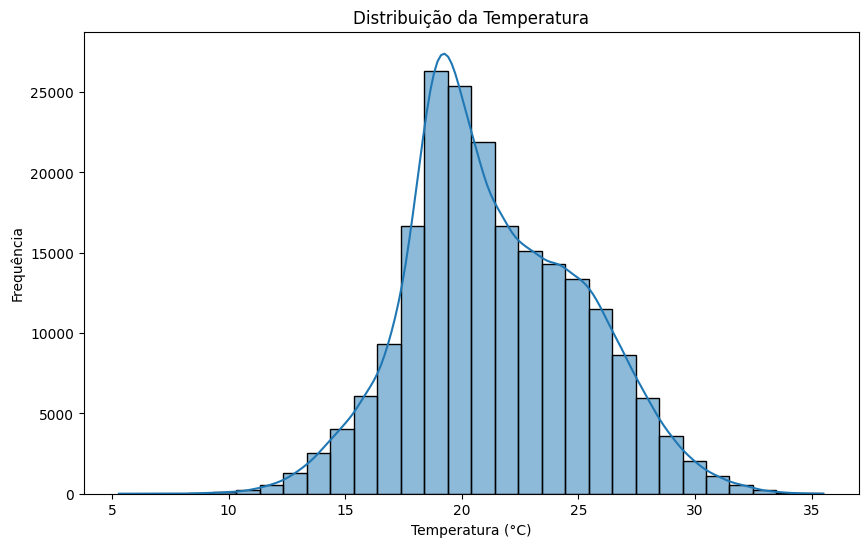

In [61]:
# Distribuição da temperatura
plt.figure(figsize=(10, 6))
sns.histplot(df['TEMPERATURA'].dropna(), bins=30, kde=True)
plt.title('Distribuição da Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.show()

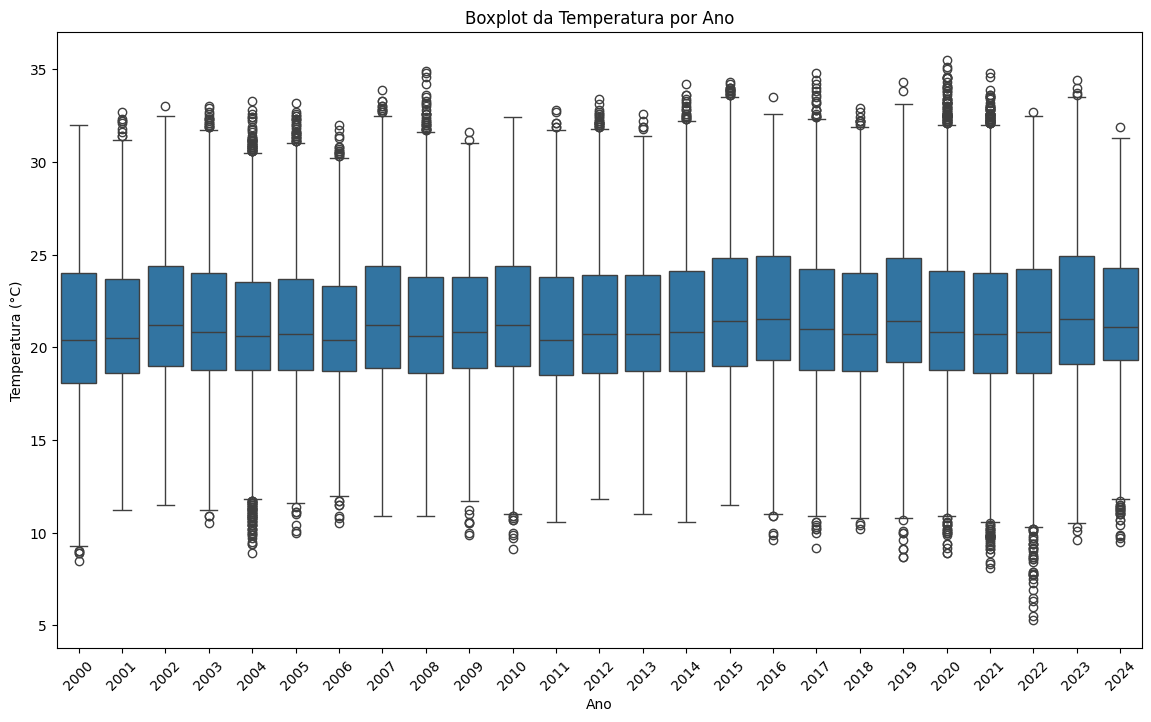

In [62]:
# Boxplot da temperatura por ano
plt.figure(figsize=(14, 8))
sns.boxplot(x='ANO', y='TEMPERATURA', data=df)
plt.title('Boxplot da Temperatura por Ano')
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)
plt.show()

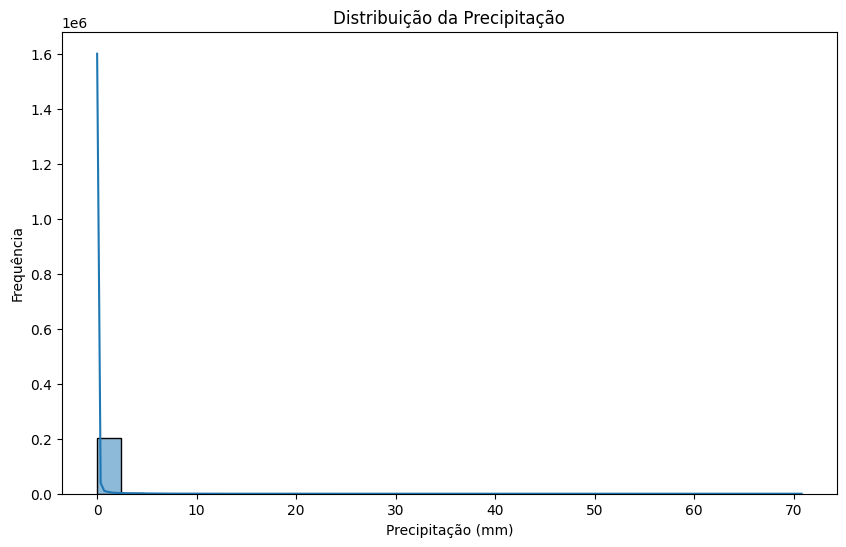

In [63]:
# Distribuição da precipitação
plt.figure(figsize=(10, 6))
sns.histplot(df['PRECIPITACAO_HORARIO_mm'].dropna(), bins=30, kde=True)
plt.title('Distribuição da Precipitação')
plt.xlabel('Precipitação (mm)')
plt.ylabel('Frequência')
plt.show()

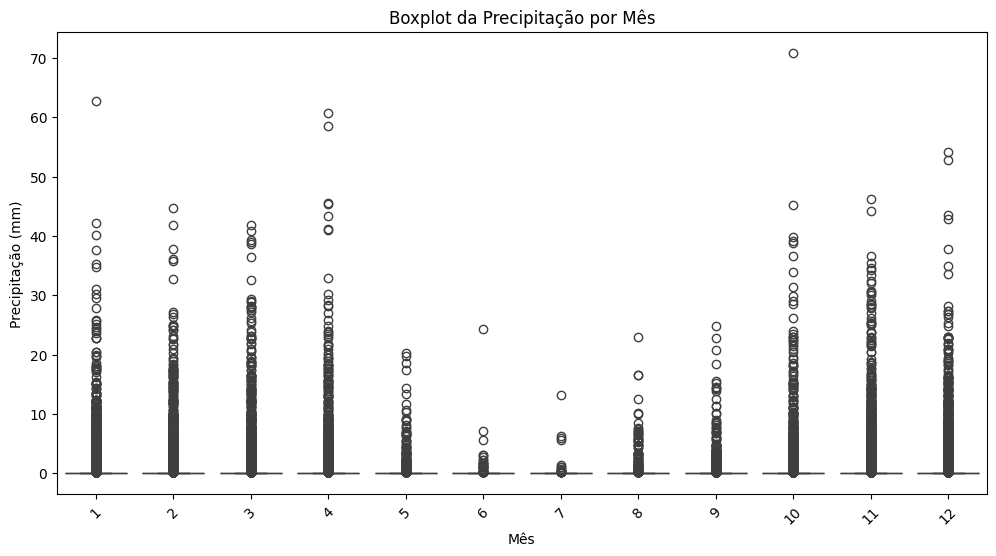

In [64]:
# Boxplot da precipitação por mês
plt.figure(figsize=(12, 6))
sns.boxplot(x='MES', y='PRECIPITACAO_HORARIO_mm', data=df)
plt.title('Boxplot da Precipitação por Mês')
plt.xlabel('Mês')
plt.ylabel('Precipitação (mm)')
plt.xticks(rotation=45)
plt.show()


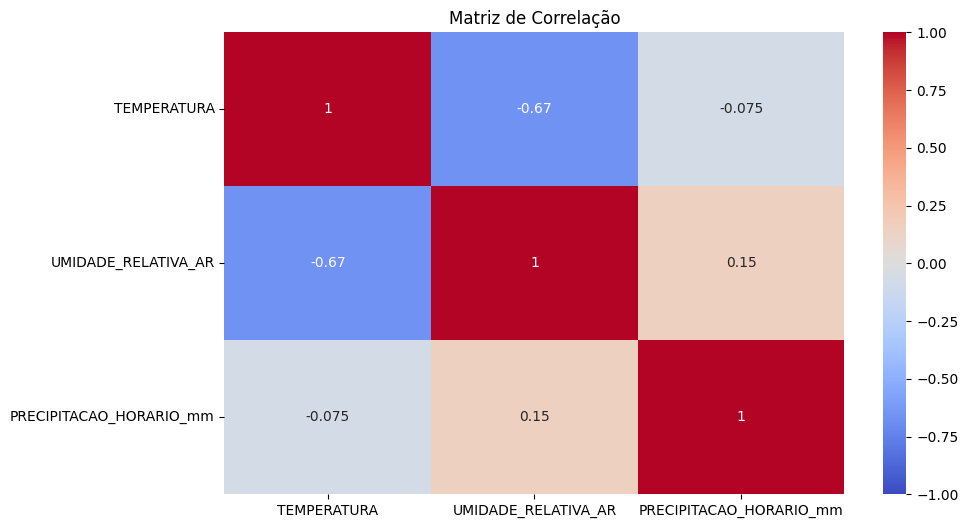

In [65]:
# Analisando a correlação entre as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df[['TEMPERATURA', 'UMIDADE_RELATIVA_AR', 'PRECIPITACAO_HORARIO_mm']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

### Questões a serem respondidas

In [66]:
import requests

request_content = requests.get('https://github.com/alexvaroz/data_science_alem_do_basico/raw/master/historico_meteorologico_brasilia.csv')
arquivo_base = open("dados_meteorologicos.csv", 'w')
arquivo_base.write(str(request_content.text))
arquivo_base.close()

# Maior temperatura e seu dia

In [67]:
from functools import reduce

def find_max_temperature(data):
    # Filtra os dados para garantir que apenas entradas válidas sejam usadas
    def is_valid_entry(row):
        try:
            float(row['TEMPERATURA'])
            return True
        except ValueError:
            return False

    filtered_data = filter(is_valid_entry, data)
    
    # Mapeia os dados para uma lista de tuplas (temperatura, data)
    def map_to_temp_date(row):
        temp = float(row['TEMPERATURA'])
        date = row['DATA']
        return (temp, date)

    temp_date_pairs = map(map_to_temp_date, filtered_data)
    
    # Reduz os pares para encontrar a máxima temperatura e a data correspondente
    def reducer(acc, pair):
        temp, date = pair
        if temp > acc[0]:
            return (temp, date)
        return acc

    max_temp, max_temp_date = reduce(reducer, temp_date_pairs, (float('-inf'), None))
    
    return max_temp, max_temp_date


# Temperatura média anual

In [68]:
from functools import reduce

def calculate_avg_temp_per_year(data):
    # Filtra os dados para garantir que apenas entradas válidas sejam usadas
    def is_valid_entry(row):
        try:
            float(row['TEMPERATURA'])
            return True
        except ValueError:
            return False

    filtered_data = filter(is_valid_entry, data)
    
    # Mapeia os dados para uma lista de tuplas (ano, temperatura)
    def map_to_year_temp(row):
        year = row['ANO']
        temp = float(row['TEMPERATURA'])
        return (year, temp)

    year_temp_pairs = map(map_to_year_temp, filtered_data)
    
    # Reduz os pares para somar as temperaturas e contar os valores por ano
    def reducer(acc, pair):
        year, temp = pair
        if year in acc:
            acc[year][0] += temp
            acc[year][1] += 1
        else:
            acc[year] = [temp, 1]
        return acc

    temp_counts = reduce(reducer, year_temp_pairs, {})
    
    # Calcula as médias de temperatura e ordena os anos
    avg_temps = {year: total / count for year, (total, count) in temp_counts.items()}
    sorted_avg_temps = dict(sorted(avg_temps.items()))
    
    return sorted_avg_temps


# Maior quantidade de chuva

In [69]:
from functools import reduce

def find_max_rainfall(data):
    # Filtra os dados para garantir que apenas entradas válidas sejam usadas
    def is_valid_entry(row):
        try:
            float(row['PRECIPITACAO_HORARIO_mm'])
            return True
        except ValueError:
            return False

    filtered_data = filter(is_valid_entry, data)
    
    # Mapeia os dados para uma lista de tuplas (precipitação, data)
    def map_to_rain_date(row):
        rain = float(row['PRECIPITACAO_HORARIO_mm'])
        date = row['DATA']
        return (rain, date)

    rain_date_pairs = map(map_to_rain_date, filtered_data)
    
    # Reduz os pares para encontrar a máxima precipitação e a data correspondente
    def reducer(acc, pair):
        rain, date = pair
        if rain > acc[0]:
            return (rain, date)
        return acc

    max_rain, max_rain_date = reduce(reducer, rain_date_pairs, (float('-inf'), None))
    
    return max_rain, max_rain_date


# Mês com maior média de chuva e sua média

In [70]:
from functools import reduce

def calculate_avg_rainfall_per_month(data):
    # Filtra os dados para garantir que apenas entradas válidas sejam usadas
    def is_valid_entry(row):
        try:
            float(row['PRECIPITACAO_HORARIO_mm'])
            return True
        except ValueError:
            return False

    filtered_data = filter(is_valid_entry, data)

    # Mapeia os dados para uma lista de tuplas (ano-mês, precipitação)
    def map_to_year_month_rain(row):
        year = int(row['ANO'])
        month = int(row['MES'])
        rain = float(row['PRECIPITACAO_HORARIO_mm'])
        key = f'{year}-{month:02d}'
        return (key, rain)
    
    year_month_rain_pairs = map(map_to_year_month_rain, filtered_data)
    
    # Reduz os pares para somar as precipitações e contar os valores por ano-mês
    def reducer(acc, pair):
        key, rain = pair
        if key in acc:
            acc[key][0] += rain
            acc[key][1] += 1
        else:
            acc[key] = [rain, 1]
        return acc

    rain_counts = reduce(reducer, year_month_rain_pairs, {})
    
    # Calcula as médias de precipitação e encontra o mês com a maior média
    avg_rains = {key: total / count for key, (total, count) in rain_counts.items()}
    
    if avg_rains:
        max_month = max(avg_rains, key=avg_rains.get)
        max_avg_rain = avg_rains[max_month]
        print(f'Questão 5 - Mês com a maior média de precipitação: {max_month}, Média: {max_avg_rain:.2f} mm')
    else:
        print('Nenhum dado válido para calcular a média de precipitação.')


# Resultados

In [71]:
import csv

def load_data(file_path):
    with open(file_path, mode='r') as file:
        reader = csv.DictReader(file)
        data = [row for row in reader]
    return data


def main(file_path):
    data = load_data(file_path)

    max_temp, max_temp_date = find_max_temperature(data)
    print(f'Questão 1 - Máx. Temp.: {max_temp}')

    print('-------------------------------------------------')

    print(f'Questão 2 - Dia mais quente: {max_temp_date}')

    print('-------------------------------------------------')
    
    avg_temp_per_year = calculate_avg_temp_per_year(data)
    for year, avg_temp in avg_temp_per_year.items():
        print(f'Questão 3 - Ano: {year}, Temp. Média: {avg_temp:.2f}')

    print('-------------------------------------------------')
    
    max_rain, max_rain_date = find_max_rainfall(data)
    print(f'Questão 4 - Máx. Chuva: {max_rain} mm em {max_rain_date}')
    
    print('-------------------------------------------------')

    calculate_avg_rainfall_per_month(data)



if __name__ == '__main__':
    main("dados_meteorologicos.csv")


Questão 1 - Máx. Temp.: 35.5
-------------------------------------------------
Questão 2 - Dia mais quente: 2020-10-08
-------------------------------------------------
Questão 3 - Ano: 2000, Temp. Média: 20.93
Questão 3 - Ano: 2001, Temp. Média: 21.09
Questão 3 - Ano: 2002, Temp. Média: 21.67
Questão 3 - Ano: 2003, Temp. Média: 21.31
Questão 3 - Ano: 2004, Temp. Média: 21.06
Questão 3 - Ano: 2005, Temp. Média: 21.27
Questão 3 - Ano: 2006, Temp. Média: 20.91
Questão 3 - Ano: 2007, Temp. Média: 21.65
Questão 3 - Ano: 2008, Temp. Média: 21.18
Questão 3 - Ano: 2009, Temp. Média: 21.30
Questão 3 - Ano: 2010, Temp. Média: 21.62
Questão 3 - Ano: 2011, Temp. Média: 21.06
Questão 3 - Ano: 2012, Temp. Média: 21.29
Questão 3 - Ano: 2013, Temp. Média: 21.26
Questão 3 - Ano: 2014, Temp. Média: 21.37
Questão 3 - Ano: 2015, Temp. Média: 21.99
Questão 3 - Ano: 2016, Temp. Média: 22.04
Questão 3 - Ano: 2017, Temp. Média: 21.47
Questão 3 - Ano: 2018, Temp. Média: 21.25
Questão 3 - Ano: 2019, Temp. Médi